0.999999976777167
2.999999401941591
4.999989530411245
6.99988316908914
8.999060604874671


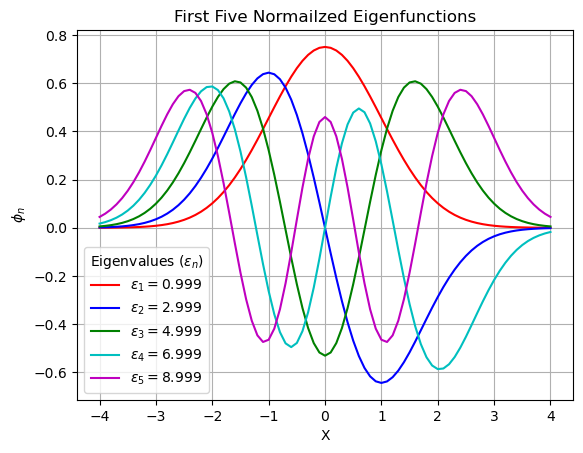

In [2]:
# Josh Kreutz
# 10/15/2024 
# AMATH 581 HW #2

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

# initialize variables and parameters
tol = 1e-6 # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm'] # eigenfunc colors 
K = 1; 
L = 4
xdomain = [-L, L]
step = 0.1
num_points = int((xdomain[1] - xdomain[0]) / step) + 1
xshoot = np.linspace(xdomain[0], xdomain[1], num_points)
eigenvalues = [] # empty list for storing eigenvalues
eigenfunctions = [] # empty list for storing eigenfunctions

# define shooting function
def shoot2(x, j, K, epsilon): 
    return [x[1], (K*j**2 - epsilon) * x[0]] 

epsilon_start = 0.1 # beginning value of epsilon

# shooting method loop pew pew
for modes in range(1, 6): # begin mode loop 
    epsilon = epsilon_start # initial value of eigenvalue epsilon 
    depsilon = K / 1 # default step size in epsilon
    for _ in range(1000): # begin convergence loop for epsilon 
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xshoot, args=(K,epsilon)) 
        
        if abs(y[-1, 0] * np.sqrt(L**2 - epsilon) + y[-1, 1] - 0) < tol: # check for convergence 
           print(epsilon) # write out eigenvalue break # get out of convergence loop 
           break
        if (-1) ** (modes + 1) * (y[-1, 0] * np.sqrt(L**2 - epsilon) + y[-1, 1]) > 0: 
            epsilon += depsilon  
        else: 
            epsilon -= depsilon / 2 
            depsilon /= 2 

    # get eigenvalues
    eigenvalues.append(epsilon) # list of eigenvalues
    eigenarray = np.array(eigenvalues) # put eigenvalues list into array
    
    # get eigenfunctions and plot them
    epsilon_start = epsilon + 0.1 # after finding eigenvalue, pick new start 
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot) # calculate the normalization
    eigenfunctions.append(abs(y[:, 0] / np.sqrt(norm))) # list of absolute value eigenfunctions
    eigenfunctionarray = np.array(eigenfunctions) # put eigenfunctions list into array
    transposed_eignenfunctions = eigenfunctionarray.T # transpose eigenfunction array
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1]) # plot normalized eigenfunctions
    #plt.plot(xshoot, abs(y[:, 0] / np.sqrt(norm)), col[modes- 1]) # plot absolute value normailzed eigenfunctions 

# add legend to plot    
plt.xlabel('X')
plt.ylabel('$\phi_n$')
plt.title('First Five Normailzed Eigenfunctions')
plt.grid(True)
plt.legend(['$\epsilon_1 = 0.999$','$\epsilon_2 = 2.999$','$\epsilon_3 = 4.999$',
            '$\epsilon_4 = 6.999$','$\epsilon_5 = 8.999$'] , loc='lower left', ncol = 1, fontsize = 10, title = 'Eigenvalues $(\epsilon_n)$')

A1 = transposed_eignenfunctions
A2 = eigenarray    